# Heart Disease Prediction

## Importing essential libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding our dataset

In [2]:
#Reading the file
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [3]:
#First 5 rows of the dataset
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
#Statistics about the data
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
#Number of rows and columns in the dataset
df.shape

(270, 14)

In [6]:
#List of columns in the dataset
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
#More information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
#Checking for missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
#Count of unique values for 
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [10]:
#Number of unique values in each column
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

Clearly, there are many columns that have categorical data.

In [11]:
#Storing columns containing categorical and continuous data in seperate lists
categorical = []
continuous = []
for col in df.columns:
    if len(df[col].unique()) <= 5:
        categorical.append(col)
    else:
        continuous.append(col)

In [12]:
categorical

['Sex',
 'Chest pain type',
 'FBS over 120',
 'EKG results',
 'Exercise angina',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

In [13]:
continuous

['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

## EDA

In [14]:
#Color codes
heartred = '#D76F80'
heartblue = '#C7CBE5'
heartyellow = '#FEE5B3'
heartbrown = '#450E10'

### Categorical Data

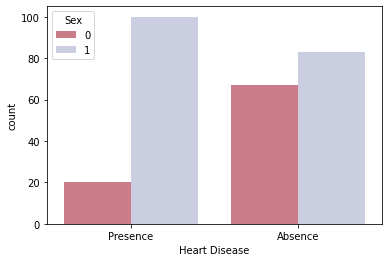

In [15]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Sex', palette = [heartred, heartblue])

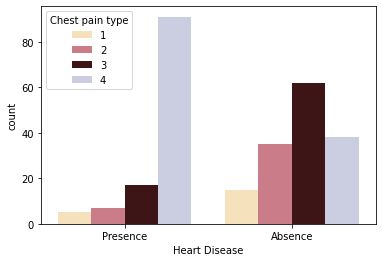

In [16]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Chest pain type', palette = [heartyellow, heartred, heartbrown, heartblue])

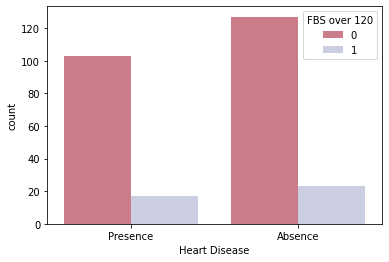

In [17]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'FBS over 120', palette = [heartred, heartblue])

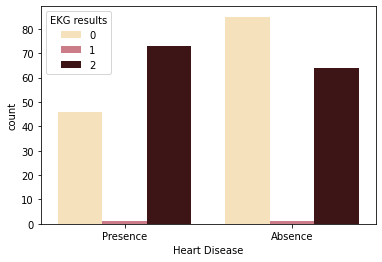

In [18]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'EKG results', palette = [heartyellow, heartred, heartbrown])

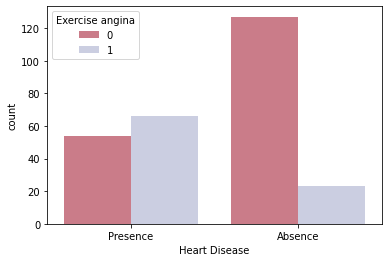

In [19]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Exercise angina', palette = [heartred, heartblue])

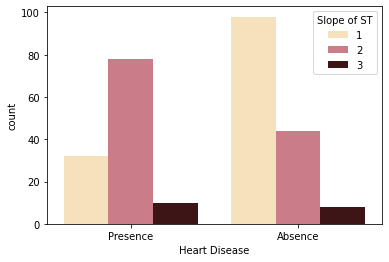

In [20]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Slope of ST', palette = [heartyellow, heartred, heartbrown])

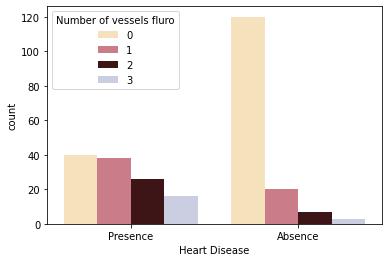

In [21]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Number of vessels fluro', palette = [heartyellow, heartred, heartbrown, heartblue])

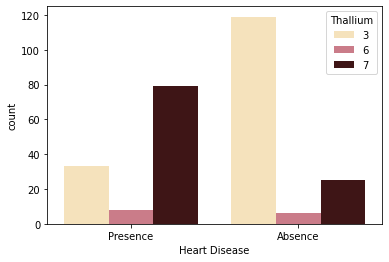

In [22]:
sns.countplot(x = df['Heart Disease'], data = df, hue = 'Thallium', palette = [heartyellow, heartred, heartbrown])

### Continuous Data

In [23]:
#Minimum age of person diagnosed with heart disease
df.Age[df['Heart Disease'] == 'Presence'].min()

35

In [24]:
df.groupby('Heart Disease')['Age'].mean()

Heart Disease
Absence     52.706667
Presence    56.591667
Name: Age, dtype: float64

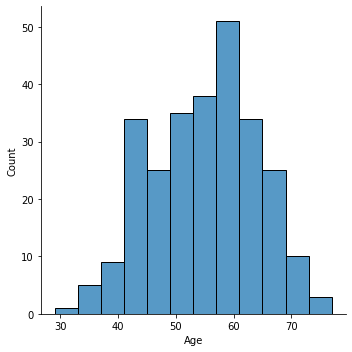

In [25]:
sns.displot(df['Age'])

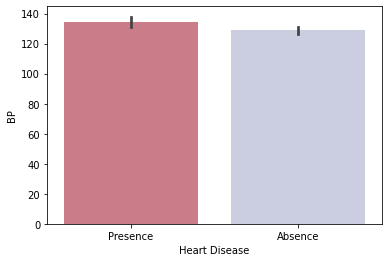

In [26]:
sns.barplot(x = df['Heart Disease'],y = df['BP'], data = df, palette = [heartred, heartblue])

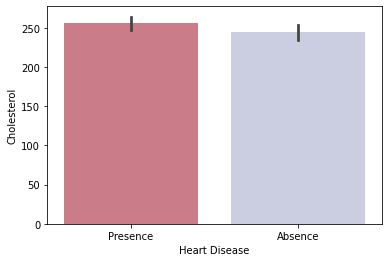

In [27]:
sns.barplot(x = df['Heart Disease'],y = df['Cholesterol'], data = df, palette = [heartred, heartblue])

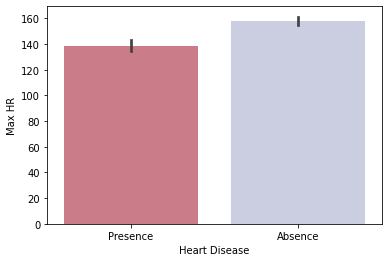

In [28]:
sns.barplot(x = df['Heart Disease'], y = df['Max HR'], data = df, palette = [heartred, heartblue])

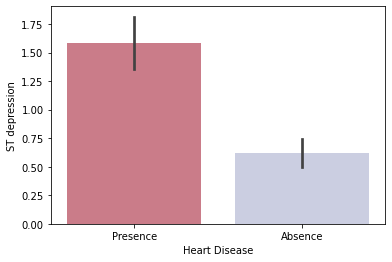

In [29]:
sns.barplot(x = df['Heart Disease'], y = df['ST depression'], data = df, palette = [heartred, heartblue])

### Correlation Matrix

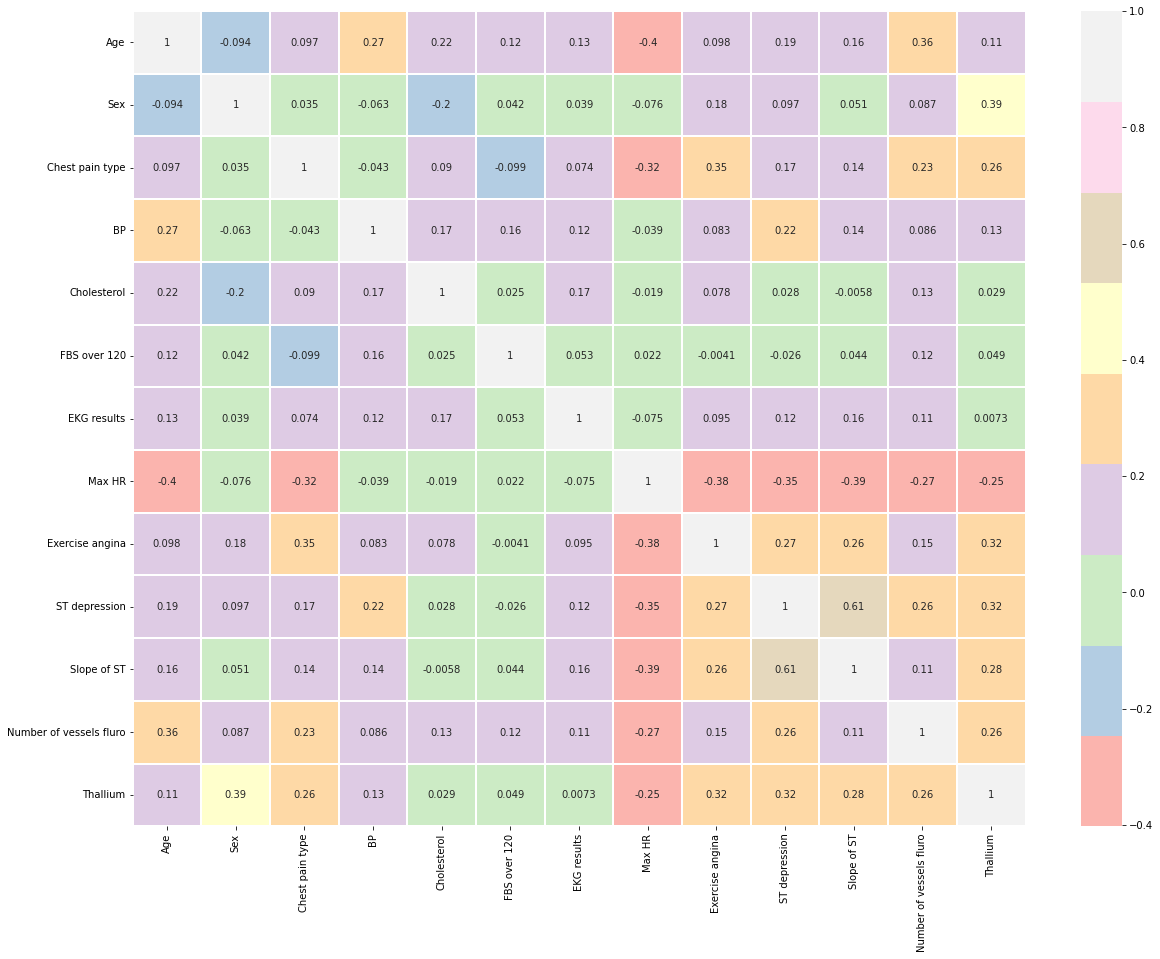

In [30]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, linewidths = 1, cmap = 'Pastel1')

## Data Preprocessing

### Encoding categorical data

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

In [32]:
df['Heart Disease'].head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

In [33]:
categorical.remove('Heart Disease')
data = pd.get_dummies(df, columns = categorical)
data.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,70,130,322,109,2.4,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
1,67,115,564,160,1.6,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,57,124,261,141,0.3,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,64,128,263,105,0.2,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,74,120,269,121,0.2,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0


### Scaling continuous data

In [34]:
sc = StandardScaler()
scaled_col = continuous
data[scaled_col] = sc.fit_transform(data[scaled_col])
data.head()

,Age,BP,Cholesterol,Max HR,ST depression,Heart Disease,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,FBS over 120_0,FBS over 120_1,EKG results_0,EKG results_1,EKG results_2,Exercise angina_0,Exercise angina_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0


In [35]:
X = data.drop(['Heart Disease'], axis = 1)
y = data['Heart Disease']

### Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Models

In [37]:
#List for model names and their respective accuracy score
models = []
scores = []

In [38]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)

In [40]:
lr_score

0.8395061728395061

In [41]:
models.append('Logistic Regression')
scores.append(lr_score)

### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)

In [43]:
nb_score

0.8271604938271605

In [44]:
models.append('Naive Bayes')
scores.append(nb_score)

### Support Vector Classifier

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)

In [46]:
svc_score

0.7901234567901234

In [47]:
models.append('Support Vector')
scores.append(svc_score)

### K Nearest Neighbours Classifier

Text(0, 0.5, 'Error')

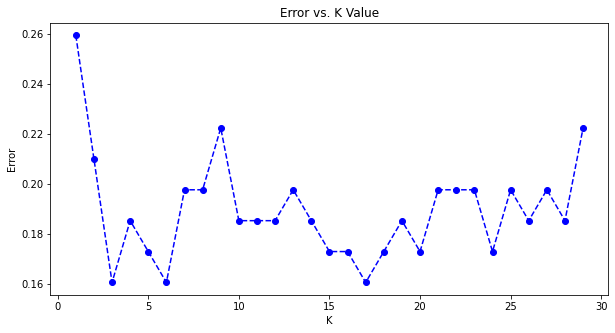

In [48]:
from sklearn.neighbors import KNeighborsClassifier

error_knn = []
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors = i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error_knn.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), error_knn, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')


In [49]:
k = error_knn.index(min(error_knn)) + 1
k

3

In [50]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)

In [51]:
knn_score

0.8395061728395061

In [52]:
models.append('K Nearest Neighbours')
scores.append(knn_score)

### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    dtc = DecisionTreeClassifier(random_state=x)
    dtc.fit(X_train,y_train)
    dtc_pred = dtc.predict(X_test)
    current_accuracy = round(accuracy_score(dtc_pred,y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [54]:
dtc = DecisionTreeClassifier(random_state = best_x)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_pred)

In [55]:
dtc_score

0.8024691358024691

In [56]:
models.append('Decision Tree')
scores.append(dtc_score)

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0
#selecting random state providing the highest accuracy
for x in range(200):
    rfc = RandomForestClassifier(random_state = x)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, rfc_pred)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        rfc_best_x = x

In [58]:
rfc = RandomForestClassifier(random_state = rfc_best_x)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_pred)

In [59]:
rfc_score

0.8518518518518519

In [60]:
models.append('Random Forest')
scores.append(rfc_score)

### XGBoost Classifier

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_pred)

In [62]:
xgb_score

0.8024691358024691

In [63]:
models.append('XGBoost')
scores.append(xgb_score)

In [64]:
models

['Logistic Regression',
 'Naive Bayes',
 'Support Vector',
 'K Nearest Neighbours',
 'Decision Tree',
 'Random Forest',
 'XGBoost']

In [65]:
scores

[0.8395061728395061,
 0.8271604938271605,
 0.7901234567901234,
 0.8395061728395061,
 0.8024691358024691,
 0.8518518518518519,
 0.8024691358024691]

## Results

In [66]:
percentage_scores = [score*100 for score in scores]

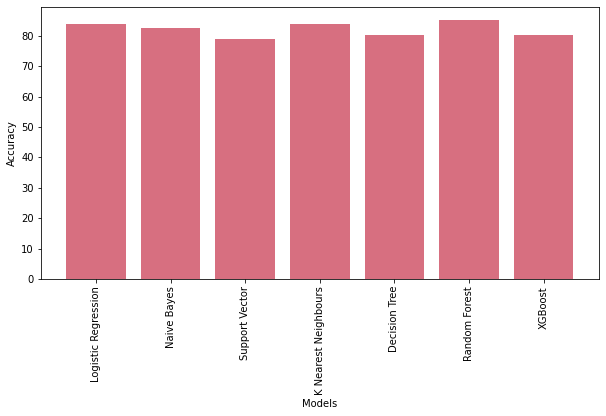

In [67]:
plt.figure(figsize=(10,5))
plt.bar(models, percentage_scores, color = heartred)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 90)
plt.show()

In [68]:
results = pd.DataFrame(list(zip(models, percentage_scores)), columns =['Models', 'Accuracy (%)'])

In [69]:
results

,Models,Accuracy (%)
0,Logistic Regression,83.950617
1,Naive Bayes,82.716049
2,Support Vector,79.012346
3,K Nearest Neighbours,83.950617
4,Decision Tree,80.246914
5,Random Forest,85.185185
6,XGBoost,80.246914


RandomForest Classifier provided the highest accuracy.

## Model Evaluation

Using confusion matrix and classification report of the RandomForest Classifier to evaluate its performance.

### Confusion Matrix



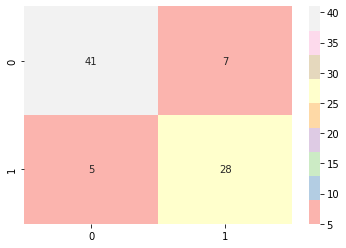

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot = True, cmap = 'Pastel1')

### Classification Report

In [71]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.80      0.85      0.82        33

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81

